# 🚙 beyond_AVR demo
> Vehicle damage detection using CNN
##### Hanyang univ. department of CSe<br/>2016003418 김인제  <br/>2016003390 김예진

## 🏁 Initial setup
> May take few minutes

In [1]:
#@markdown google drive

from google.colab import drive, files
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#@markdown library

# install effnet
!pip install -U git+https://github.com/qubvel/efficientnet

# select tf version
%tensorflow_version 1.x

# import library
!rm -rf /tmp/beyond_AVR_demo
%cd /tmp
!git clone https://github.com/injekim/beyond_AVR_demo.git
%cd /tmp/beyond_AVR_demo

from dic import *
from func import *

# !nvidia-smi

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-t3g6ko_k
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-t3g6ko_k
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-cp37-none-any.whl size=18421 sha256=f7543aa8560306cbe2bbfbab5c0743c303f6d767c1c82d6c3e9deea1431bfb41
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9_1s9d8/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
TensorFlow 1.x selected.
/tmp
Cloning into 'beyond_AVR_demo'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 6), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
/tmp/beyond_AVR_demo


Using TensorFlow backend.


In [3]:
#@markdown model

SUMMARY = False

#directories
BASE_PATH = "/gdrive/My Drive/Capstone/"
DATA_PATH = "/tmp/data/"

PATH_ORIEN = os.path.join(BASE_PATH, "direction", "차량방향확인소스", "model", "car_rotation_B0.002-0.95.h5")
PATH_DMG = os.path.join(BASE_PATH, "patch_cnn", "models", "train_3_224_448_672_ol_50", "efnetB3_damage.037-0.00-0.95.h5")

PATH_HYN = {
  "front": os.path.join(BASE_PATH, "direction", "hyundai_model", "efnetB0_front.107-0.95.h5"),
  "side": os.path.join(BASE_PATH, "direction", "hyundai_model", "efnetB0_side.150-0.82.h5"),
  "back": os.path.join(BASE_PATH, "direction", "hyundai_model", "efnetB0_back.103-0.93.h5")
}

PATH_KIA = {
  "front": os.path.join(BASE_PATH, "direction", "kia_model", "front_efnetB0_model.042-0.00043-0.95021.h5"),
  "side": os.path.join(BASE_PATH, "direction", "kia_model", "side_efnetB0_model.098-0.01276-0.91119.h5"),
  "back": os.path.join(BASE_PATH, "direction", "kia_model", "back_efnetB0_model.052-0.05-0.93.h5")
}

MODEL_ORIEN = load_model(PATH_ORIEN)
MODEL_ORIEN.load_weights(PATH_ORIEN)
if SUMMARY:
  MODEL_ORIEN.summary()

# progress bar setup
print("loading models... [" + " " * 16 + "]", end="", flush=True)

print("\b" * (17), end="")
print("{:17}".format("██" * 1) + "]", end="", flush=True)

MODEL_DMG = load_model(PATH_DMG)
MODEL_DMG.load_weights(PATH_DMG)
if SUMMARY:
  MODEL_DMG.summary()

print("\b" * (17), end="")
print("{:17}".format("██" * 2) + "]", end="", flush=True)

MODEL_KIA = {}
for i, k in enumerate(PATH_KIA.keys()):
  MODEL_KIA[k] = load_model(PATH_KIA[k])
  MODEL_KIA[k].load_weights(PATH_KIA[k])
  if SUMMARY:
    MODEL_KIA[k].summary()

  print("\b" * (17), end="")
  print("{:17}".format("██" * (3+i)) + "]", end="", flush=True)

MODEL_HYN = {}
for i, k in enumerate(PATH_HYN.keys()):
  MODEL_HYN[k] = load_model(PATH_HYN[k])
  MODEL_HYN[k].load_weights(PATH_HYN[k])
  if SUMMARY:
    MODEL_HYN[k].summary()

  print("\b" * (17), end="")
  print("{:17}".format("██" * (6+i)) + "]", end="", flush=True)

MODEL_VEH = {
    "kia": MODEL_KIA,
    "hyn": MODEL_HYN
}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

loading models... [                ]██               ]████             ]██████           ]████████         ]██████████       ]████████████     ]██████████████   ]████████████████ ]

## 📊 Select dataset

In [4]:
DATA_SET = "Use demo data" #@param ["Use demo data", "Upload image"]
DEMO = "damage_test.zip" #@param ["damage_test.zip", "model_test.zip", "model_and_damage_test.zip"]

!rm -rf /tmp/data
!mkdir /tmp/data
%cd /tmp/data

if DATA_SET == "Upload image":
  image = files.upload()
  while image:
    image = files.upload()
else:
  from zipfile import ZipFile
  print("[ downloading demo data ]")
  demosrc = "/gdrive/My Drive/Capstone/demo_data/" + DEMO
  with ZipFile(demosrc, 'r') as testzip:
    testzip.extractall('/tmp/data')

%cd /tmp/

/tmp/data
[ downloading demo data ]
/tmp


## ⚙️ Options

In [5]:
#@markdown #### 🎲 Functions
DAMAGE_DETECTION = True #@param {type:"boolean"}
MODEL_DETECTION = False #@param {type:"boolean"}

#@markdown ---
#@markdown #### 🚙 Damage detection
#@markdown Patch
PATCH_SIZE = 200 #@param {type:"number"}
STEP_SIZE = 50 #@param {type:"number"}
SHOW_PROB = True #@param {type:"boolean"}
PATCH_OVERLAP = PATCH_SIZE - STEP_SIZE
#@markdown Threshold
DENT_THLD = 0.95 #@param {type:"number"}
SCRATCH_THLD = 0.75 #@param {type:"number"}

## 🎑 Detect

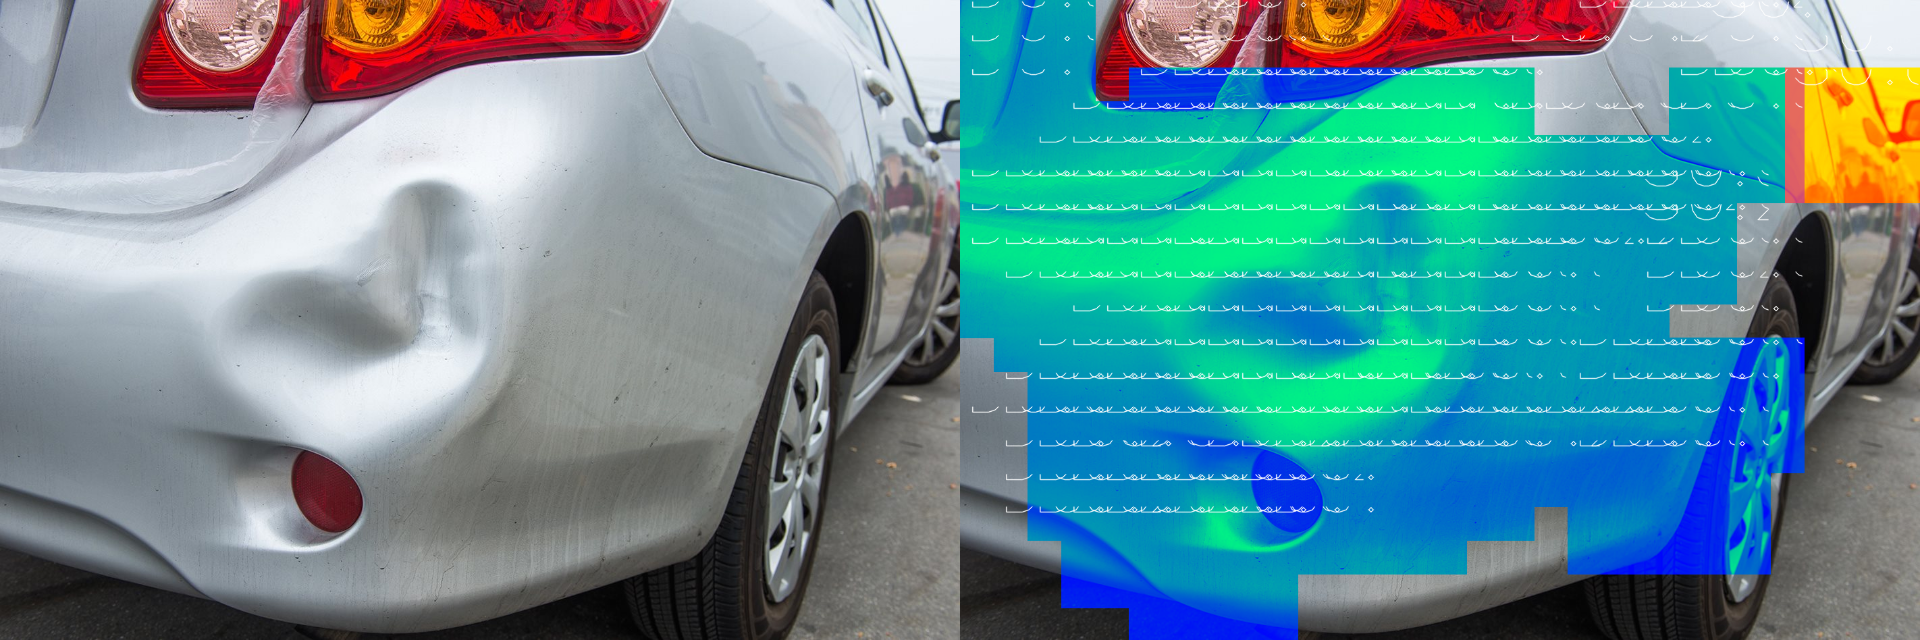

test_image_1.jpg


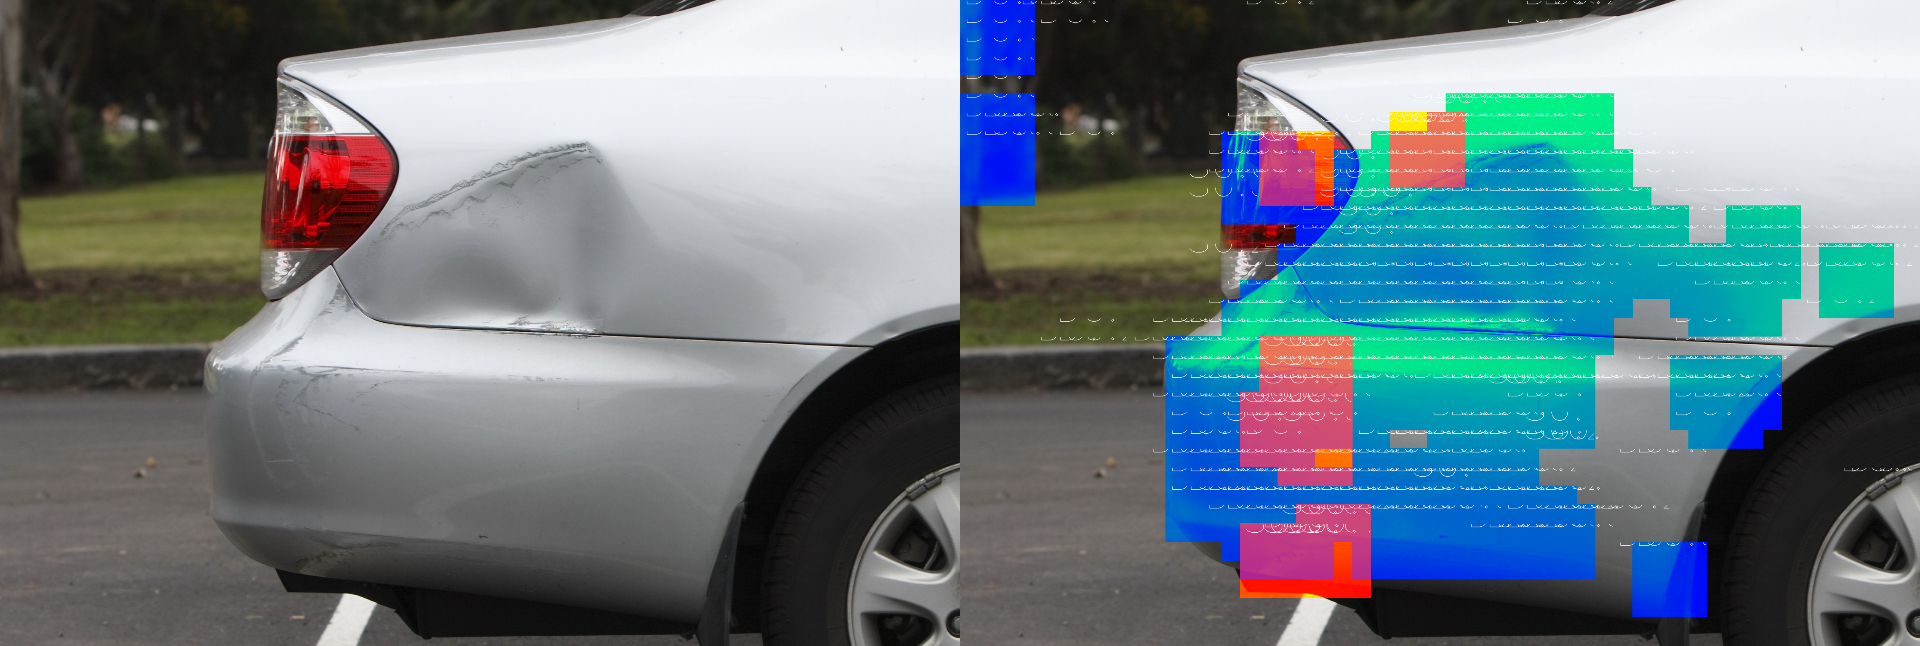

test_image_2.jpg


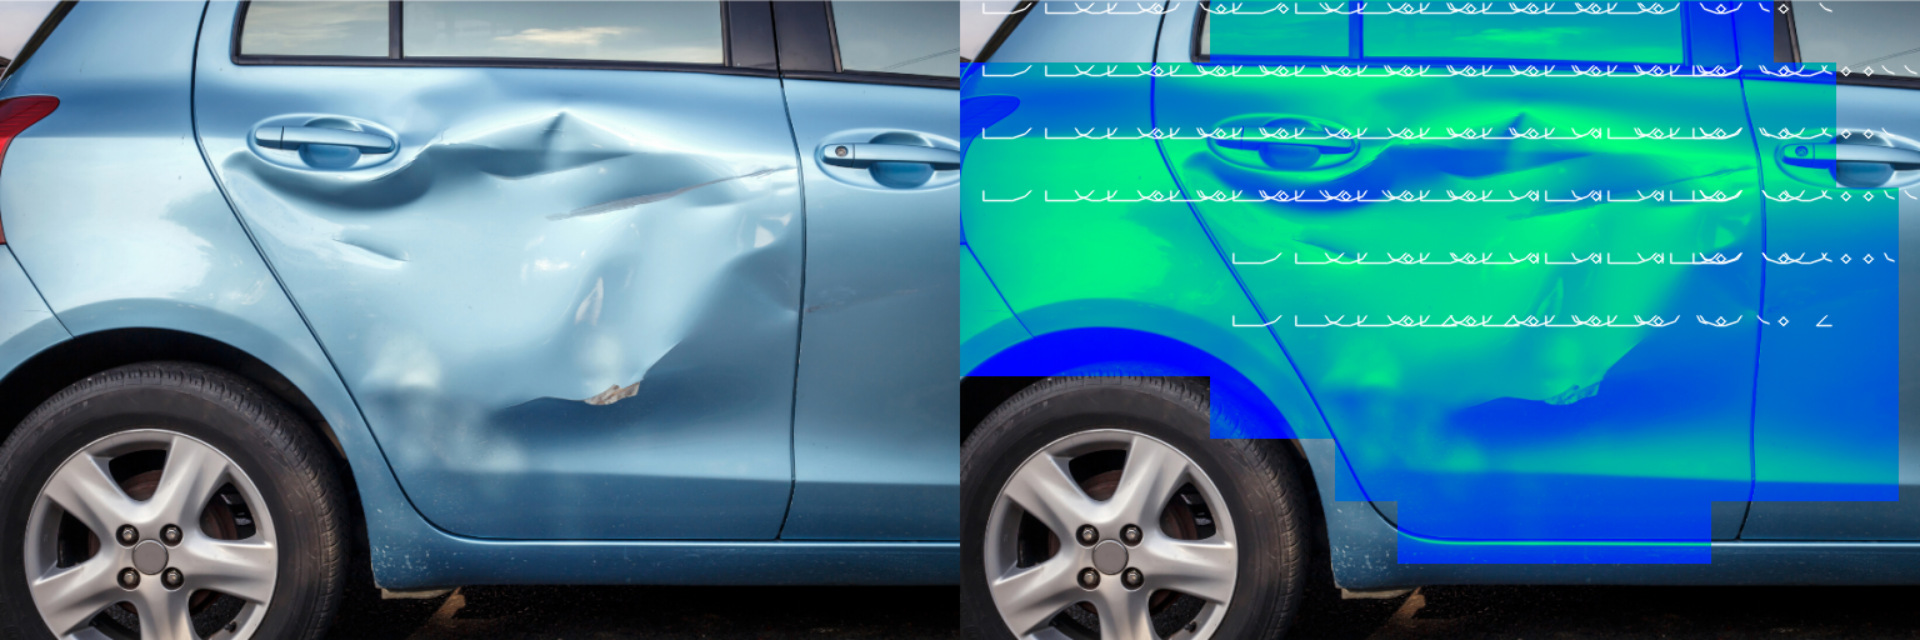

test_image_3.png


In [6]:
#@markdown result
# import images
imgs = os.listdir(DATA_PATH)
imgs.sort()

for i in imgs:
  img = cv2.imread(os.path.join(DATA_PATH, i))
  height, width, channels = img.shape

  if MODEL_DETECTION:
    # detect orienttaion
    o, orien, prob_o, cid_o, x = detect_orientation(img, ANGLE_FRONT_MAX, ANGLE_SIDE_MAX, MODEL_ORIEN, DICT_OREN)

    # detect vehicle model
    mfr, veh, prob_v, cid_v, x = detect_vehicle(img, orien, MODEL_VEH, DICT_VEH)

    # generate heat map
    img_hm = generate_heatmap(MODEL_VEH['kia'][orien], x, cid_v, 'top_activation')
    img_veh = merge_with_heatmap(img[..., ::-1], img_hm)

  if DAMAGE_DETECTION:
    # detect damage
    damage, probs, coords = detect_damage(img, width, height, PATCH_SIZE, STEP_SIZE, DENT_THLD, SCRATCH_THLD, MODEL_DMG)
    
    # add overlay
    img_dmg = damage_overlay(img, damage, coords)

    # add text
    if SHOW_PROB:
      for j, c in enumerate(coords):
        x0, x1, y0, y1 = c[0][0], c[1][0], c[0][1], c[1][1]
        patch = img_dmg[y0:y1, x0:x1]

        if probs[j][1] > 0.1:
          text_overlay(patch, 5, 10, "D", probs[j][1], STEP_SIZE)
        if probs[j][2] > 0.1:
          text_overlay(patch, 5, 25, "S", probs[j][2], STEP_SIZE)
  
  # combine results
  if DAMAGE_DETECTION and MODEL_DETECTION:
    img_comb = cv2.hconcat([img_veh, img_dmg])
  elif MODEL_DETECTION:
    img_comb = cv2.hconcat([img, img_veh])
  elif DAMAGE_DETECTION:
    img_comb = cv2.hconcat([img, img_dmg])
  
  # scale output image
  scale = float(1920)/(width*2);
  img_final = cv2.resize(img_comb, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
  
  # print result
  cv2_imshow(img_final)
  print(i)
  if MODEL_DETECTION:
    print(mfr, orien, veh, prob_v)
